In [1]:
from sklearn.datasets import make_blobs
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn # for plot styling
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import SpectralClustering
from pandas.plotting import scatter_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import confusion_matrix


In [2]:
iye=pd.read_csv('datanilai2.csv', sep=";")
iye.index+=1
iye.head()

,NIS,NAMA,L/P,Kehadiran (5%),NH,UTS,UAS,Pengetahuan,Keterampilan,Total,Kelulusan,Sikap
1,15501,ADHIKA NUGRAHA,L,38,91,84,76,84,56,82,1,A
2,15801,ADITYA HIMAWAN HOGANTARA R.L.,L,39,65,85,76,73,55,77,0,A
3,15507,AGUNG RISKY SETYAWAN,L,40,63,80,78,72,97,81,1,A
4,15514,ALIFA AYU MIRANTI HARTONO,P,40,74,80,78,77,81,81,1,A
5,15531,ANYS KHOIRIYAH,P,40,72,82,76,76,95,82,1,A


In [3]:
iye=pd.read_csv('datanilai2.csv', sep=";")
iye.index+=1
iye.head(6)
#iye

,NIS,NAMA,L/P,Kehadiran (5%),NH,UTS,UAS,Pengetahuan,Keterampilan,Total,Kelulusan,Sikap
1,15501,ADHIKA NUGRAHA,L,38,91,84,76,84,56,82,1,A
2,15801,ADITYA HIMAWAN HOGANTARA R.L.,L,39,65,85,76,73,55,77,0,A
3,15507,AGUNG RISKY SETYAWAN,L,40,63,80,78,72,97,81,1,A
4,15514,ALIFA AYU MIRANTI HARTONO,P,40,74,80,78,77,81,81,1,A
5,15531,ANYS KHOIRIYAH,P,40,72,82,76,76,95,82,1,A
6,15537,ARIF RAHMAN,L,40,80,84,76,79,64,81,1,A


In [4]:
iki = iye.iloc[:,3:-1]
#iki.head()
iki.head(11)

,Kehadiran (5%),NH,UTS,UAS,Pengetahuan,Keterampilan,Total,Kelulusan
1,38,91,84,76,84,56,82,1
2,39,65,85,76,73,55,77,0
3,40,63,80,78,72,97,81,1
4,40,74,80,78,77,81,81,1
5,40,72,82,76,76,95,82,1
6,40,80,84,76,79,64,81,1
7,40,80,84,72,78,97,83,1
8,40,97,85,68,83,85,84,1
9,40,87,85,72,81,98,85,1
10,38,63,82,83,75,74,80,1


In [5]:
target = iki['Kelulusan']
np_data = iki.iloc[:,: -1]
np_data.head(7)

,Kehadiran (5%),NH,UTS,UAS,Pengetahuan,Keterampilan,Total
1,38,91,84,76,84,56,82
2,39,65,85,76,73,55,77
3,40,63,80,78,72,97,81
4,40,74,80,78,77,81,81
5,40,72,82,76,76,95,82
6,40,80,84,76,79,64,81
7,40,80,84,72,78,97,83


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
np_data, target, test_size=0.2, random_state=0)

In [7]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train)

In [8]:
y_pred = nbtrain.predict(x_test) #menentukan hasil prediksi dr x_test
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [9]:
# Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test).ravel()

array([4.34173877e-01, 5.65826123e-01, 1.67021428e-07, 9.99999833e-01,
       9.99945945e-01, 5.40545754e-05, 2.80030689e-12, 1.00000000e+00,
       9.99996414e-01, 3.58618297e-06, 6.25488991e-01, 3.74511009e-01,
       9.96577797e-01, 3.42220313e-03, 5.09638105e-01, 4.90361895e-01,
       8.55811536e-09, 9.99999991e-01, 1.21949202e-04, 9.99878051e-01,
       9.44415943e-01, 5.55840574e-02, 6.06668618e-06, 9.99993933e-01,
       7.01883326e-09, 9.99999993e-01, 4.78680504e-02, 9.52131950e-01,
       7.02873465e-09, 9.99999993e-01, 2.49355380e-10, 1.00000000e+00,
       9.99999978e-01, 2.21650990e-08, 1.32519608e-09, 9.99999999e-01,
       9.95961021e-01, 4.03897884e-03, 6.45381639e-07, 9.99999355e-01,
       1.00890623e-03, 9.98991094e-01, 9.90486815e-01, 9.51318506e-03,
       9.99999595e-01, 4.05311481e-07, 1.16761201e-01, 8.83238799e-01,
       9.99993846e-01, 6.15422310e-06, 1.22250803e-06, 9.99998777e-01,
       8.68133091e-01, 1.31866909e-01, 9.98105777e-01, 1.89422251e-03,
      

In [10]:
# import confusion_matrix model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11,  0],
       [ 4, 21]], dtype=int64)

In [11]:
print("Accuracy:\n%s \n" % metrics.accuracy_score(y_test, y_pred)) 
print("Precision:\n%s \n" % metrics.precision_score(y_test, y_pred, average ='macro'))
print("Recall:\n%s \n" % metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy:
0.8888888888888888 

Precision:
0.8666666666666667 

Recall:
0.8888888888888888 



In [12]:
gauss = GaussianNB()
gauss.fit(x_train,y_train)
target2 = gauss.predict(x_test)

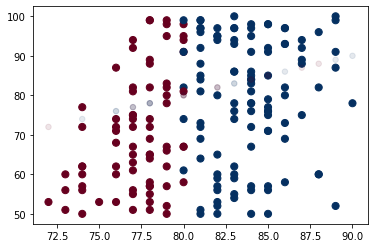

In [16]:
plt.scatter(iye['Total'], iye['Keterampilan'], c=target, s=50, cmap='RdBu') 
#plt.scatter(iki[:,0], iki[:,1], c=target, s=50, cmap='RdBu') 
lim = plt.axis() 
plt.scatter(iye.Total[144:], iye.Total[144:], c=target2, s=30, cmap='RdBu', alpha=0.1)  #145-180
plt.axis(lim);

In [14]:
#fit (), selalu menginisialisasi parameter seperti objek baru, dan melatih model dengan dataset yang lolos dalam metode fit ().
#Sedangkan partial_fit (), bekerja di atas parameter inisialisasi dan mencoba meningkatkan bobot yang ada dengan dataset baru yang dilalui
    #pada partial_fit ().


In [15]:
#1. Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga 
  #dikenal sebagai Teorema Bayes.
#2. Keuntungan penggunan metode ini yaitu hanya membutuhkan jumlah data pelatihan (training data) yang kecil 
  #untuk menentukan estimasi parameter yang diperlukan dalam proses pengklasifikasian.
#3. Pada praktikum di atase menggunakan atribut kelulusan sebagai label
#4. Cocok untuk dataset dengan input variabel ber-tipe kategorikal atau nominal
#5. 